100%|██████████| 100/100 [04:52<00:00,  2.99s/it]


tensor(-1139.9206)
[tensor(-1427.4508), tensor(-1194.6000), tensor(-1442.4426), tensor(-1402.1519), tensor(-1208.0345), tensor(-1250.9698), tensor(-1240.2582), tensor(-1254.9890), tensor(-1170.3877), tensor(-1510.4083), tensor(-1236.6562), tensor(-1246.6516), tensor(-1412.1609), tensor(-1206.4162), tensor(-1305.1450), tensor(-1393.1275), tensor(-1314.3540), tensor(-1303.9466), tensor(-1167.0307), tensor(-1201.0015), tensor(-1283.7709), tensor(-1255.2956), tensor(-1315.5813), tensor(-1156.2084), tensor(-1240.2839), tensor(-1164.8296), tensor(-1126.1370), tensor(-1194.8092), tensor(-1071.2042), tensor(-1152.4760), tensor(-1219.2258), tensor(-1232.3689), tensor(-1275.3887), tensor(-1216.3295), tensor(-1304.1780), tensor(-1204.3246), tensor(-1171.6863), tensor(-1221.9582), tensor(-1118.3585), tensor(-1134.2979), tensor(-1274.9221), tensor(-1073.5687), tensor(-1164.0440), tensor(-1208.0724), tensor(-1282.8278), tensor(-1182.3615), tensor(-1067.9518), tensor(-1089.4962), tensor(-1248.6011), 

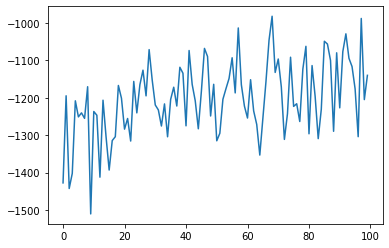

In [5]:
from seagul.rl.models import PpoModel


import torch.nn as nn
from seagul.rl.algos.ppo import ppo
from seagul.nn import MLP, CategoricalMLP
import torch
import gym



import matplotlib.pyplot as plt
%matplotlib inline
import seagul.envs

torch.set_default_dtype(torch.double)
env_name= "Pendulum-v0"

input_size = 3
output_size = 1
layer_size = 12
num_layers = 2
activation = nn.ReLU

policy = MLP(input_size, output_size, num_layers, layer_size, activation)
value_fn = MLP(input_size, 1, num_layers, layer_size, activation)
model = PpoModel(policy, value_fn, action_var=.5, discrete=False)

# env2, t_policy, t_val, rewards = ppo('InvertedPendulum-v2', 100, policy, value_fn)
t_model, rewards, var_dict = ppo(env_name, 
                                100, 
                                model, 
                                action_var_schedule = [.3],
                                env_timesteps = 200,
                                epoch_batch_size=2048,
                                gamma=0.99,
                                lam=0.99,
                                eps=0.2,
                                seed=0,
                                policy_batch_size=1024,
                                value_batch_size=1024,
                                policy_lr=1e-4,
                                value_lr=1e-5,
                                p_epochs=32,
                                v_epochs=32,
                                use_gpu=False,
                                reward_stop=None)
print(rewards)
plt.plot(rewards)

locals().update(var_dict)

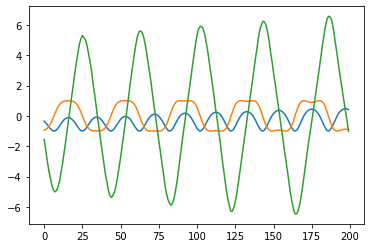

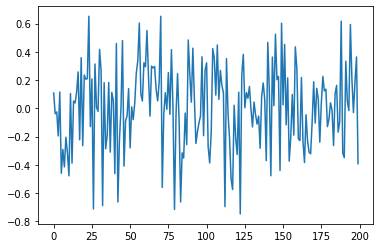

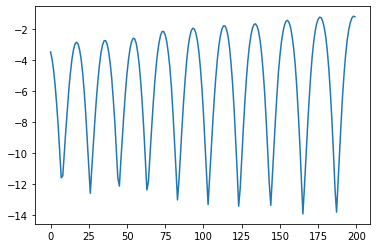

In [6]:
env = gym.make(env_name)

done = False
obs = env.reset()

obs_list = []
act_list = []
rew_list = []
while not done:
    act, val, _,_ = model.step(obs)
    obs,rew,done,_ = env.step(act.reshape(-1))
    
    obs_list.append(obs)
    act_list.append(act)
    rew_list.append(rew)
    
plt.plot(obs_list)
plt.figure()
plt.plot(act_list)
plt.figure()
plt.plot(rew_list)
    

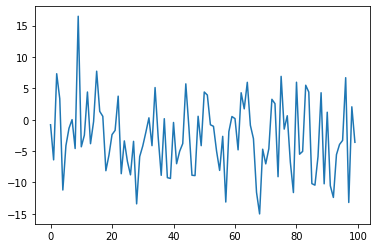

In [7]:
plt.plot(p_loss_hist)

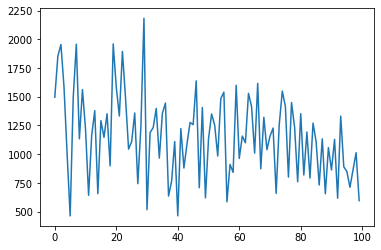

In [8]:
plt.plot(v_loss_hist)